In [1]:
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from tensorflow.keras.layers import Dropout, BatchNormalization, Conv1D, Lambda, MaxPooling1D, Reshape, BatchNormalization, Flatten, UpSampling1D, Dense, AveragePooling1D
from datetime import datetime
from tensorflow.keras import regularizers
from keras import backend as K

from training.datapipe import Datapipe
from training.callbacks import DrawImageCallback
from training.model import createVAEModel


In [2]:

# The parameters of the config file
ih, iw = 256, 4
latent_dim = 2


# Load model and weights
model, encoder, decoder = createVAEModel(ih,iw,latent_dim)
model.load_weights("weights_cpk.h5")

In [27]:


x = np.random.normal(size=(10,2))

geoms = decoder(x)

w=2
h=5

fig, axs = plt.subplots(h, w, figsize=(10,10))


for idx in range(geoms.shape[0]):
    j,i = idx%w, idx//w
    #axs[i,j].title(f"Latent Space {np.around(x[idx,:],2)}")
    axs[i,j].plot(geoms[idx,:,0],  geoms[idx,:,1]/5,'b-')
    axs[i,j].plot(geoms[idx,:,2], -geoms[idx,:,3]/5,'r-')
    axs[i,j].axis("equal")
    axs[i,j].axis('off')
    axs[i,j].title.set_text(f"Latent Space {np.around(x[idx,:],2)}")

plt.show()

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1


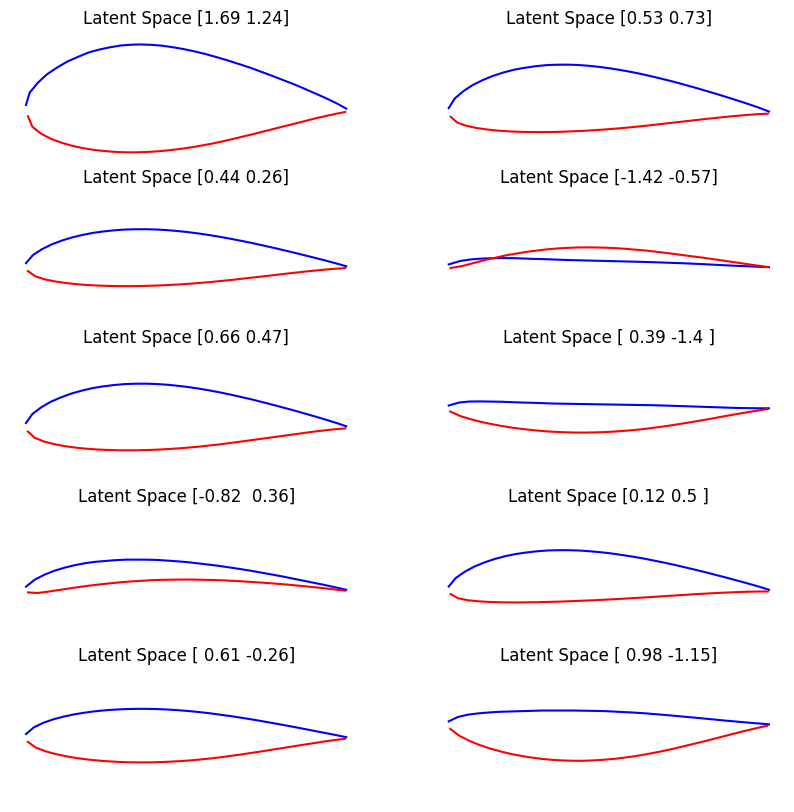